*M2 MIGS -- Statistique pour les big data -- Université de Bourgogne -- 2022-2023*

# Travaux pratiques 1 : Problème poursuite de base et courbe de transition

In [1]:
# on importe les modules numpy et pyplot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Dans le cellule ci-dessous ajouter votre code permettant de résoudre le problème poursuite de base :**  

## Exercice 1 

Soit $A\in \mathbb{R}^{2\times 3}$ et $b\in \mathbb{R}^{2}$ définis ci-dessous :
$$A=\begin{pmatrix} 2 & 1 & 1\\
1& 2 & 1
\end{pmatrix} \text{ et } b=\begin{pmatrix} 4 \\-1
\end{pmatrix}. $$

**1)** Démontrer que $x^*=(3,-2,0)^T$ est une solution poursuite de base du système linéaire d'équations $Ax=b$.

**2)** Retrouver une approximation de la solution poursuite de base $x^*=(3,-2,0)^T$ en utilisant une méthode numérique.

## Exercice 2 : Courbe de transition et mesures linéaires

Une image peut être représentée comme une matrice $I\in \mathbb{R}^{q\times r}$
où chaque coefficient de $I$ code pour la couleur d'un pixel.
Lorsque les pixels blancs sont codés par $0$, l'image suivante du chiffre neuf est très parcimonieuse.

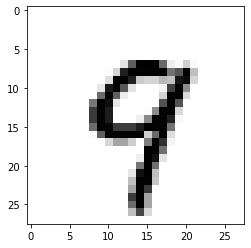

In [2]:
neuf = np.zeros(784)

ind_pixel_gris = np.array([208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 234, 235, 236, 237, 238, 239, 240, 
241, 242, 243, 244, 245, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 289, 290, 291, 292, 293, 297, 298, 299,
300, 317, 318, 319, 320, 325, 326, 327, 328, 344, 345, 346, 347, 352, 353, 354, 355, 372, 373, 374, 379, 380, 381, 382, 383, 400, 401, 402,
406, 407, 408, 409, 410, 411, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 456, 457, 458, 459, 460, 461,
462, 463, 464, 465, 466, 486, 487, 488, 489, 491, 492, 493, 494, 519, 520, 521, 546, 547, 548, 549, 574, 575, 576, 
601, 602, 603, 604, 629, 630, 631, 632, 657, 658, 659, 685, 686, 687, 713, 714, 715, 741, 742, 743], dtype=int)

niveau_gris = np.array([0.19215686, 0.70588235, 0.99215686, 1.,0.99215686, 0.6627451, 0.14117647, 0.04313725, 
0.29803922, 0.03529412, 0.01960784, 0.26666667, 0.89411765, 0.98823529, 0.98823529, 0.99215686, 0.98823529, 
0.98823529, 0.62745098, 0.74117647, 0.99215686, 0.36078431, 0.21568627, 0.98823529, 0.98823529, 0.89019608, 
0.30980392, 0.27058824, 0.27058824, 0.39215686, 0.35294118, 0.9254902,  0.96862745, 0.2627451,  0.16862745, 
0.91372549, 0.98823529, 0.7254902,  0.19607843, 0.10196078, 0.79607843, 0.98823529, 0.52941176, 0.65882353, 
0.99215686, 0.69803922, 0.14509804, 0.2745098, 0.98823529, 0.98823529, 0.24705882, 0.60784314, 0.99215686, 
0.94901961, 0.16470588, 0.01960784, 0.74901961, 0.99215686, 0.74509804, 0.81176471, 0.98823529, 0.90196078, 
0.01960784, 0.53333333, 0.98823529, 0.98823529, 0.25098039, 0.81176471, 0.98823529, 0.90196078, 0.1254902,  
0.54117647, 0.98823529, 0.98823529, 0.89019608, 0.0627451,  0.64705882, 0.98823529, 0.97647059, 0.81176471, 
0.81176471, 0.81176471, 0.89411765, 0.99215686, 0.98823529, 0.98823529, 0.62745098, 0.03529412, 0.70196078, 
0.99215686, 0.98823529, 0.98823529, 0.98823529, 0.98823529, 0.29411765, 0.6627451, 0.98823529, 0.21960784, 
0.25098039, 0.45490196, 0.45490196, 0.29019608, 0.58431373, 0.99215686, 0.84313725, 0.08235294, 0.99215686, 
0.98823529, 0.63529412, 0.1254902,  0.99215686, 0.94117647, 0.19607843, 0.61568627, 0.99215686, 0.64313725, 
0.16862745, 0.94117647, 0.99215686, 0.36078431, 0.36470588, 0.99215686, 0.98823529, 0.32941176, 0.44705882, 
0.98823529, 0.81960784, 0.81176471, 0.98823529, 0.45490196, 0.64705882, 0.98823529, 0.45490196, 0.36470588, 
0.78431373, 0.24705882])

neuf[ind_pixel_gris]=niveau_gris

I_neuf = neuf.reshape(28, 28)
plt.imshow(I_neuf, cmap="Greys")
plt.show()
plt.close()

**1)** Déterminer la dimension $p=qr$ de l'image précédente et le nombre de pixels gris $k$ de cette image.  

Une mesure linéaire $m$ de la matrice $I$ est le produit scalaire entre  $M\in \mathbb{R}^{q\times r}$
et $I$ c'est-à-dire  $Tr(M^TI)=m$.
 En général, $M$ est une réalisation d'une matrice aléatoire gaussienne standard générée à partir d'un $q\times r-$échantillon expérimental d'une loi $\mathcal{N}(0,1)$.
Soit $M_1,\dots,M_n\in \mathbb{R}^{q\times r}$ une famille de matrices  et 
$m_1,\dots,m_n$  des mesures linéaires où $n<qr$. Par construction, $I$ est une solution (parmi une infinité de solutions) du système linéaire d'équations 
$$\begin{cases}Tr(M_1^TX)=m_1\\ \quad \quad \quad \vdots \\ Tr(M_n^TX)=m_n\end{cases}.$$
Considérons le problème de poursuite de base suivant
$$\underset{X\in \mathbb{R}^{q\times r}}{\min}\sum_{i=1}^{q}\sum_{j=1}^{r}| X_{ij}| \text{sous les contraintes }
\forall l \in \{1,\dots,n\}\; Tr(M_l^TX)=m_l.
$$
Nous cherchons à choisir un nombre de mesures $n$ aussi petit que possible permettant de récupérer $I$ en résolvant le problème poursuite.
Pour déterminer ce nombre de mesures nous allons utiliser la courbe de transition de Donoho-Tanner (courbe de la fonction $\delta_{DT}$) dont la représentation paramétrique  est donnée ci-dessous :
$$
        \{ (\zeta, \delta_{DT}(\zeta)), \zeta \in (0,1) \} = \left\{ 
            \left(\frac{2(\varphi(t) - t(1-\Phi(t))}{t + 2(\varphi(t) - t(1-\Phi(t)))},
                \frac{2\varphi(t)}{t + 2(\varphi(t) - t(1-\Phi(t)))}
            \right),t \in (0, + \infty)
        \right\},
$$
où $\varphi$ et $\Phi$ sont, respectivement, la densité et fonction de répartition d'une loi $\mathcal{N}(0,1)$. 

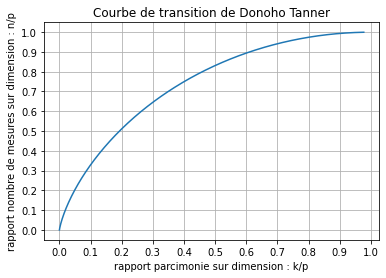

In [3]:
T = np.exp(np.linspace(-4,4,1000))

phi = stats.norm.pdf(T)
tPHI = T*(1-stats.norm.cdf(T))

X = 2*(phi - tPHI)/(T + 2 * (phi -tPHI))
Y = 2*phi/(T+2 * (phi -tPHI))

plt.xlabel('rapport parcimonie sur dimension : k/p')  
plt.ylabel('rapport nombre de mesures sur dimension : n/p')  
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.plot(X,Y)
plt.title('Courbe de transition de Donoho Tanner')
plt.show()

**2)** Résoudre le problème poursuite de base lorsque $n\in \{250,300,350,400,450,500\}$. Que peut-on observer sur le nombre de pixels gris ? Commenter votre remarque. 

attention : nombre maximal d'itérations atteint (1e+03)


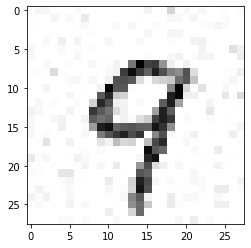

In [54]:
np.random.seed(2023) 

n =   # Compléter le nombre de mesures linéaires
p = 784
M = np.random.randn(n,p) 
m = M @ neuf # m est le vecteur des n mesures linéaires
sol0 = np.abs(BP_by_DR(M,m)).reshape((28,28))
plt.imshow(np.abs(sol0),"Greys") # On visualise la solution poursuite de base comme une image en noir et blanc
plt.show()

**3)** Que peut-on dire des points
$(136/784,250/784),(136/784, 300/784)$ et $(136/784,350/784)$ par rapport à la courbe de transition ?
Est-ce que le problème poursuite de base récupère le chiffre neuf lorsque $n\in \{250,300,350\}$ ?

**4)** Que peut-on dire des points
$(136/784,400/784),(136/784, 450/784)$ et $(136/784,500/784)$ par rapport à la courbe de transition  ?
Est-ce que le problème poursuite de base récupère le chiffre neuf lorsque $n\in \{400,450,500\}$ ?



A présent on considère l'image suivante représentant un chiffre un. 

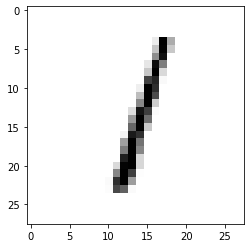

In [55]:
un=np.zeros(784)

ind_pixel_gris = np.array([128, 129, 130, 156, 157, 158, 184, 185, 211, 212, 213, 239, 240, 241, 267, 268, 269, 
294, 295, 296, 322, 323, 324, 350, 351, 352, 377, 378, 379, 380, 405, 406, 407, 433, 434, 435, 460, 461, 462, 
488, 489, 490, 516, 517, 518, 544, 545, 546, 571, 572, 573, 574, 599, 600, 601, 602, 626, 627, 628, 629, 654, 
655, 656, 657], dtype = int)

niveau_gris = np.array([0.14901961, 0.99607843, 0.42745098, 0.34117647, 0.98823529, 0.32156863, 0.52941176, 
0.94509804, 0.17647059, 0.95686275, 0.58823529, 0.32941176, 0.99607843, 0.24705882, 0.79215686, 0.8745098,  
0.04313725, 0.1254902, 0.99607843, 0.84705882, 0.37254902, 0.99607843, 0.76470588, 0.54901961, 0.99607843, 
0.30196078, 0.22352941, 0.92941176, 0.80392157, 0.03137255, 0.48627451, 1., 0.64705882, 0.67058824, 0.99607843, 
0.31764706, 0.09411765, 0.90980392, 0.84313725, 0.47058824, 0.99607843, 0.62352941, 0.59215686, 0.99607843, 
0.55686275, 0.89411765, 0.99607843, 0.25882353, 0.23921569, 0.98431373, 0.99607843, 0.25882353, 0.55294118, 
0.99607843, 0.80392157, 0.01176471, 0.03921569, 0.84313725, 0.99607843, 0.4745098, 0.01960784, 0.77647059, 
0.69019608, 0.03921569])

un[ind_pixel_gris] = niveau_gris

I_un = un.reshape(28, 28)
plt.imshow(I_un, cmap="Greys")
plt.show()
plt.close()

**5)** Déterminer la dimension de $p$ de cette image ainsi que le nombre $k$ de pixels gris. 
En utilisant le graphique de la courbe de transition, calculer $n_0 = p \times \delta_{DT}(k/p)$. 
Est-ce que $n_0$ mesures linéaires permettent de récupérer cette image ?

attention : nombre maximal d'itérations atteint (1e+03)


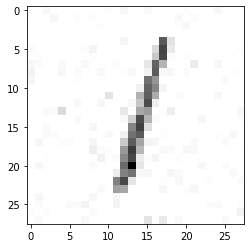

In [69]:
np.random.seed(2023) 

n =  220 # Compléter le nombre de mesures linéaires
p = 784
M = np.random.randn(n,p) 
m = M @ un # m est le vecteur des n mesures linéaires
sol1 = np.abs(BP_by_DR(M,m)).reshape((28,28))
plt.imshow(np.abs(sol1),"Greys") # On visualise la solution poursuite de base comme une image en noir et blanc
plt.show()